# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [1386]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [1387]:
bike_sharing_data = pd.read_csv('day.csv')      ## ../15 Upgrad/05 Machine Learning 01/Assignment-Bike-Sharing/
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1388]:
bike_sharing_data.shape         # data has 730 records and 16 columns (or features)

(730, 16)

# Finding the datatypes of the columns in the dataset

In [1389]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# No Null/blank values obseved in the dataset

In [1390]:
bike_sharing_data.isnull().sum()          

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# checking for duplicate records and no duplicates are seen

In [1391]:
duplicateRows = bike_sharing_data[bike_sharing_data.duplicated()]
duplicateRows.count()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Removing unwanted columns, viewing left over columns

In [1392]:
bike_sharing_data = bike_sharing_data.drop(['instant', 'dteday'], axis=1)
bike_sharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

# 'casual' + 'registered' = 'cnt'. Target var is 'cnt', so removing columns 'casual' and 'registered' 

In [1393]:
bike_sharing_data = bike_sharing_data.drop(['casual', 'registered'], axis=1)
bike_sharing_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# converting 'yr' to int64 from categorical

In [1394]:
bike_sharing_data['yr'] = bike_sharing_data.yr.astype('int64')

# Boxplot for 4 important numeric columns

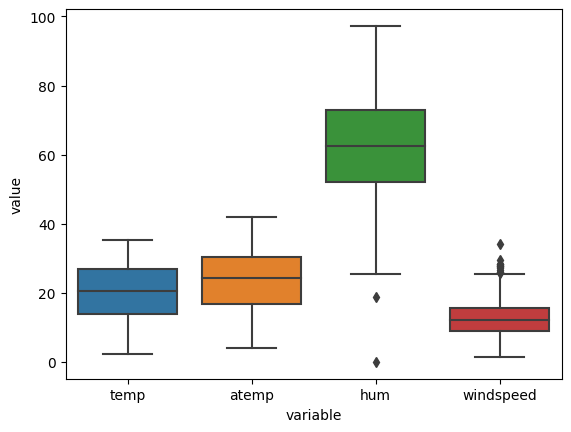

In [1395]:
df = pd.DataFrame(data = bike_sharing_data, columns = ['temp','atemp','hum','windspeed'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

# Treating outlier for columns 'hum' and 'windspeed'

In [1396]:
upper_limit = bike_sharing_data['hum'].quantile(0.99)
lower_limit = bike_sharing_data['hum'].quantile(0.01)
bike_sharing_data['hum'] = np.where(bike_sharing_data['hum'] >= upper_limit, upper_limit, np.where(bike_sharing_data['hum'] <= lower_limit, lower_limit, bike_sharing_data['hum']))

In [1397]:
upper_limit = bike_sharing_data['windspeed'].quantile(0.98)
lower_limit = bike_sharing_data['windspeed'].quantile(0.01)
bike_sharing_data['windspeed'] = np.where(bike_sharing_data['windspeed'] >= upper_limit, upper_limit, np.where(bike_sharing_data['windspeed'] <= lower_limit, lower_limit, bike_sharing_data['windspeed']))

# Checking the data distribution through boxplots again, after treating the outliers

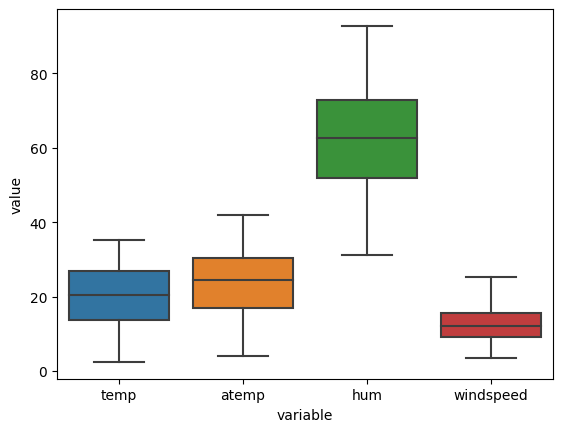

In [1398]:
df = pd.DataFrame(data = bike_sharing_data, columns = ['temp','atemp','hum','windspeed'])
sns.boxplot(x="variable", y="value", data=pd.melt(df))
plt.show()

# changing numeric columns to categorical 

In [1399]:
bike_sharing_data['season'] = bike_sharing_data.season.astype('category')
bike_sharing_data['weathersit'] = bike_sharing_data.weathersit.astype('category')
bike_sharing_data['mnth'] = bike_sharing_data.mnth.astype('category')
bike_sharing_data['weekday'] = bike_sharing_data.weekday.astype('category')


In [1400]:
bike_sharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


# Viewing histogrms for categorical data

<Figure size 2000x1000 with 0 Axes>

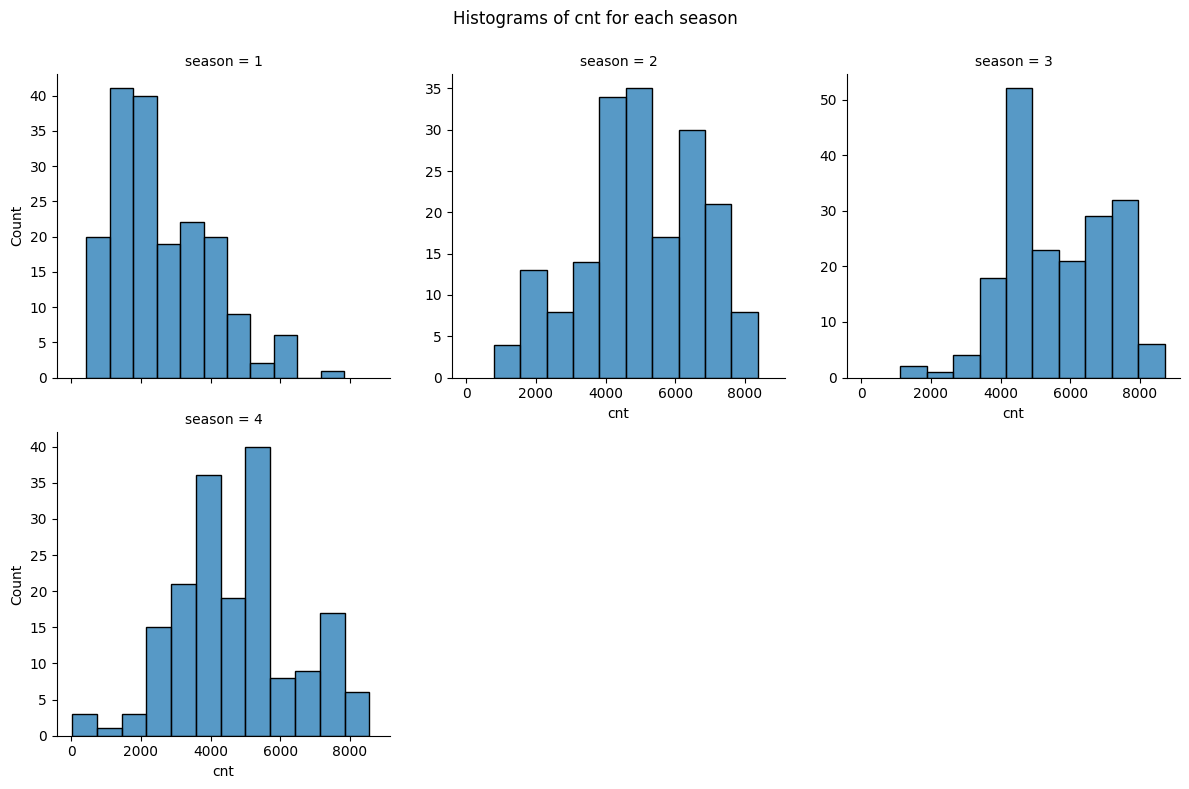

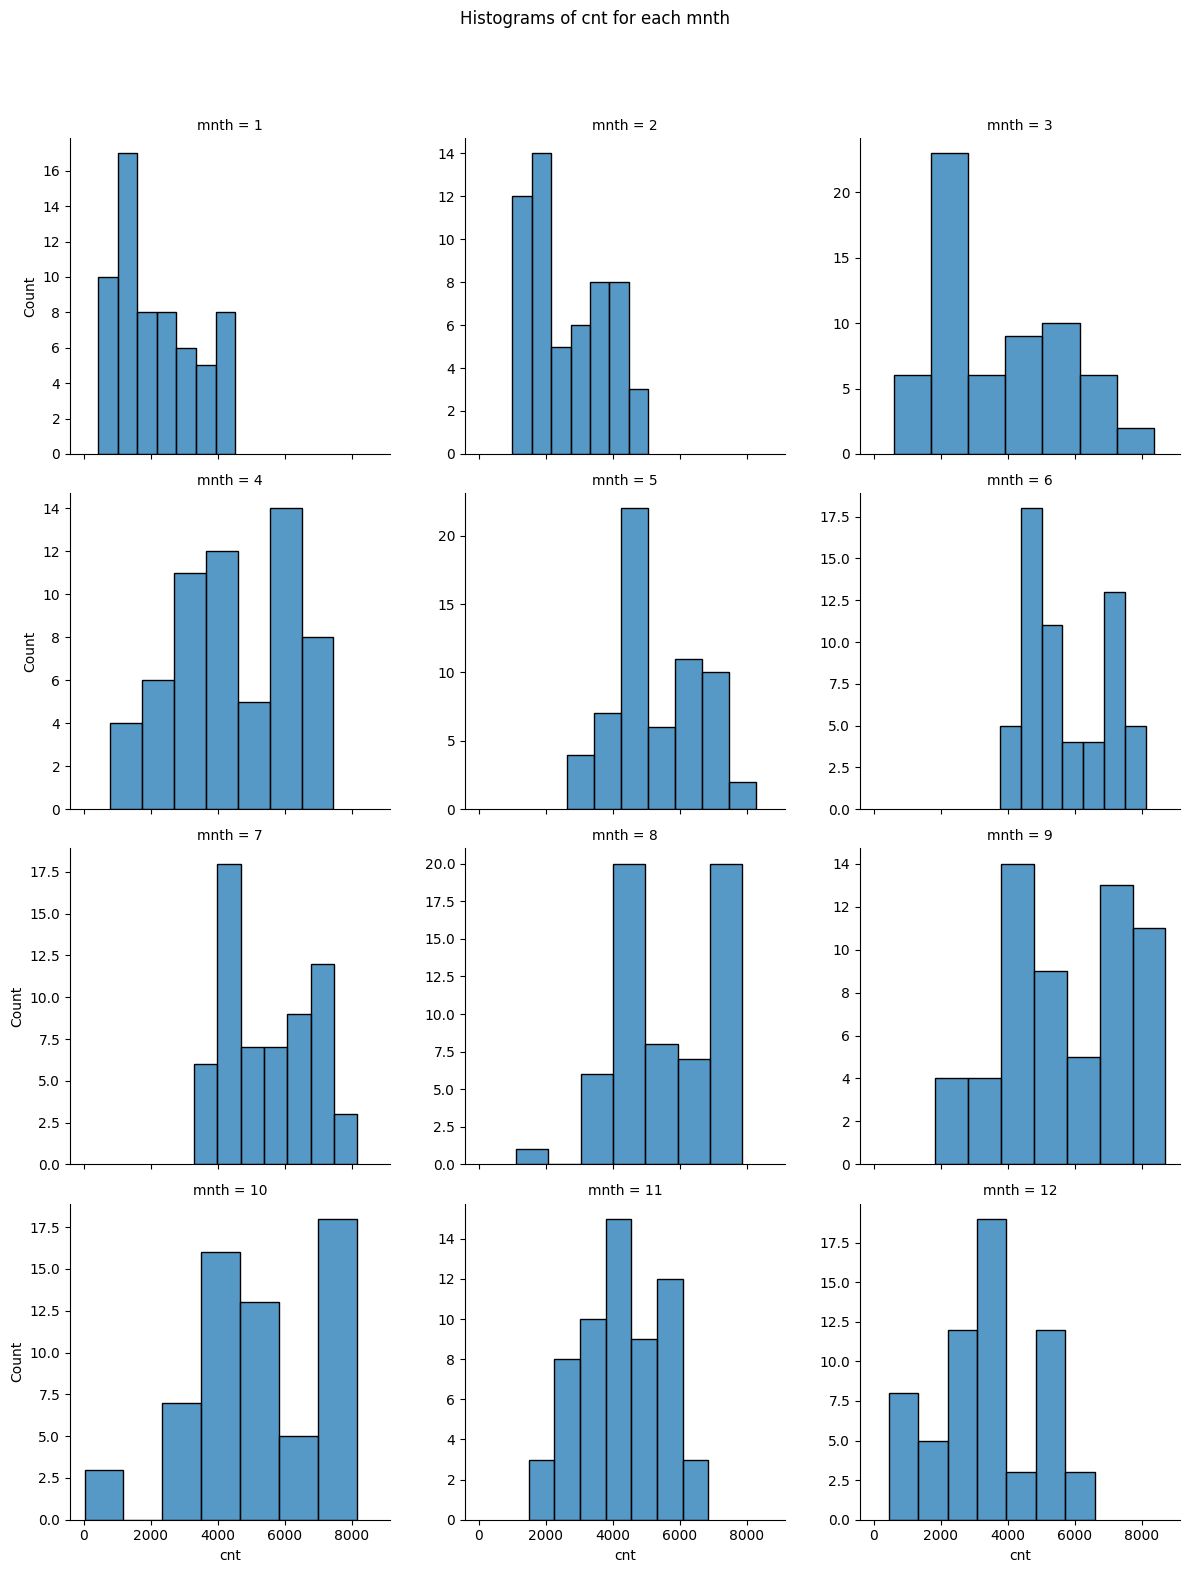

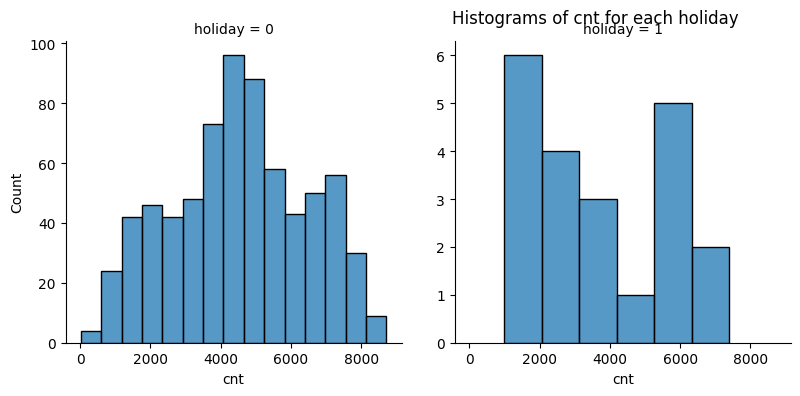

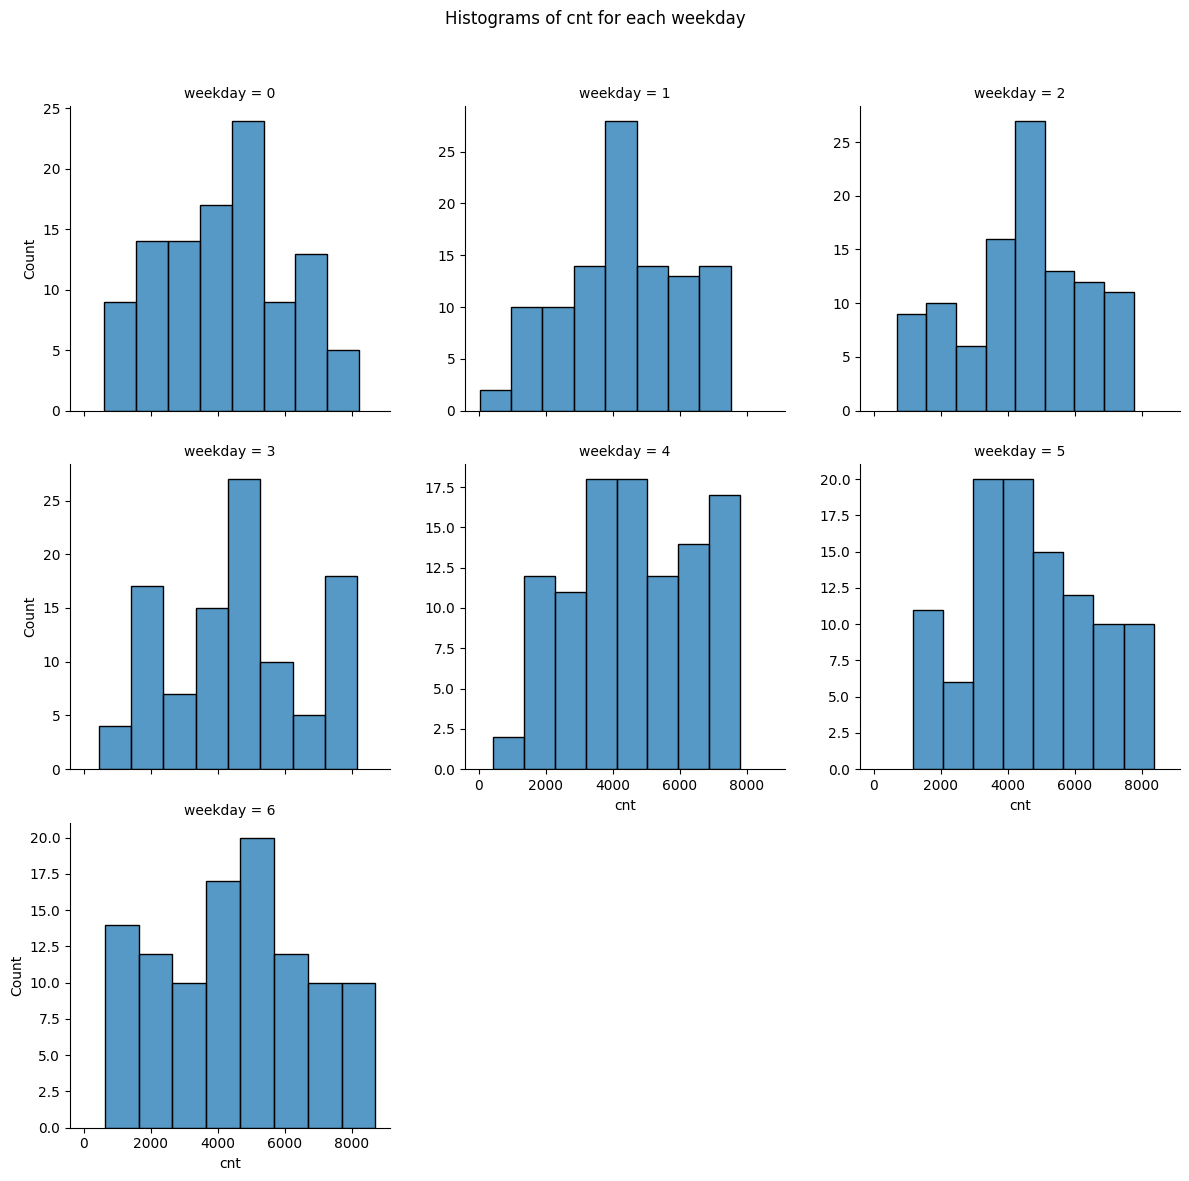

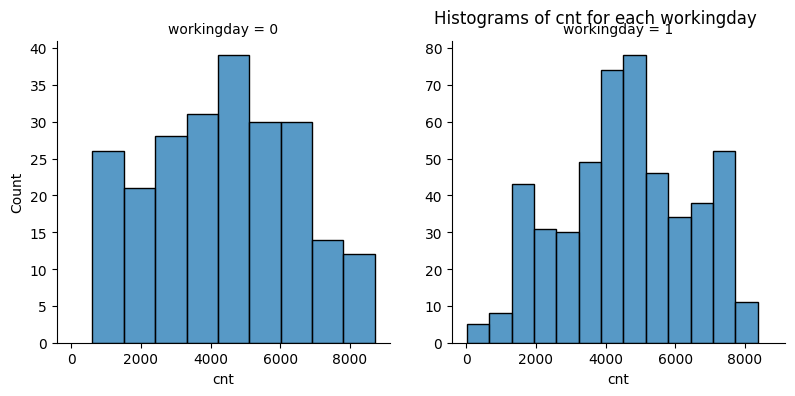

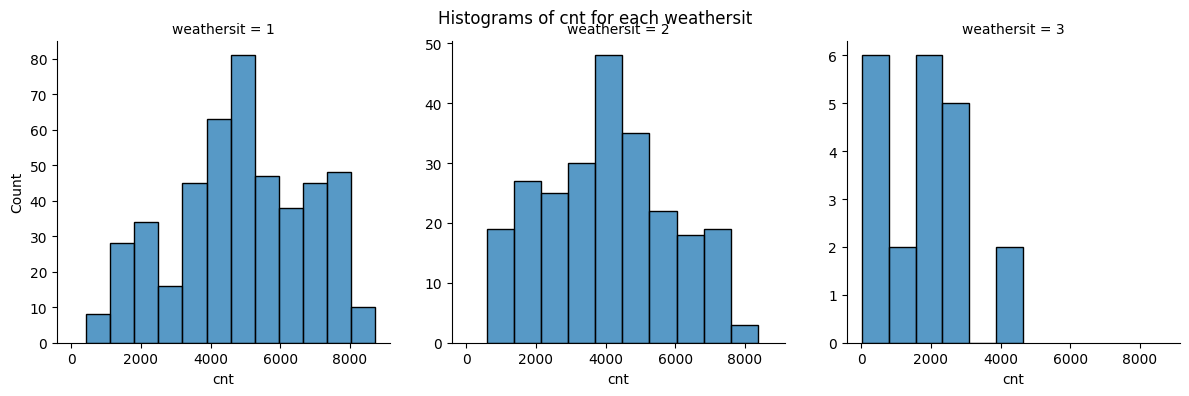

In [1401]:
plt.figure(figsize = (20,10))
categorical_columns = ['season', 'mnth', 'holiday','weekday','workingday','weathersit']
target_column = 'cnt'
for cat_column in categorical_columns:
    g = sns.FacetGrid(bike_sharing_data, col=cat_column, col_wrap=3, height=4, sharey=False)
    g.map(sns.histplot, target_column)
    g.set_axis_labels(target_column, "Count")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Histograms of {target_column} for each {cat_column}')

    plt.show()

# Understanding the distribution, using boxplots

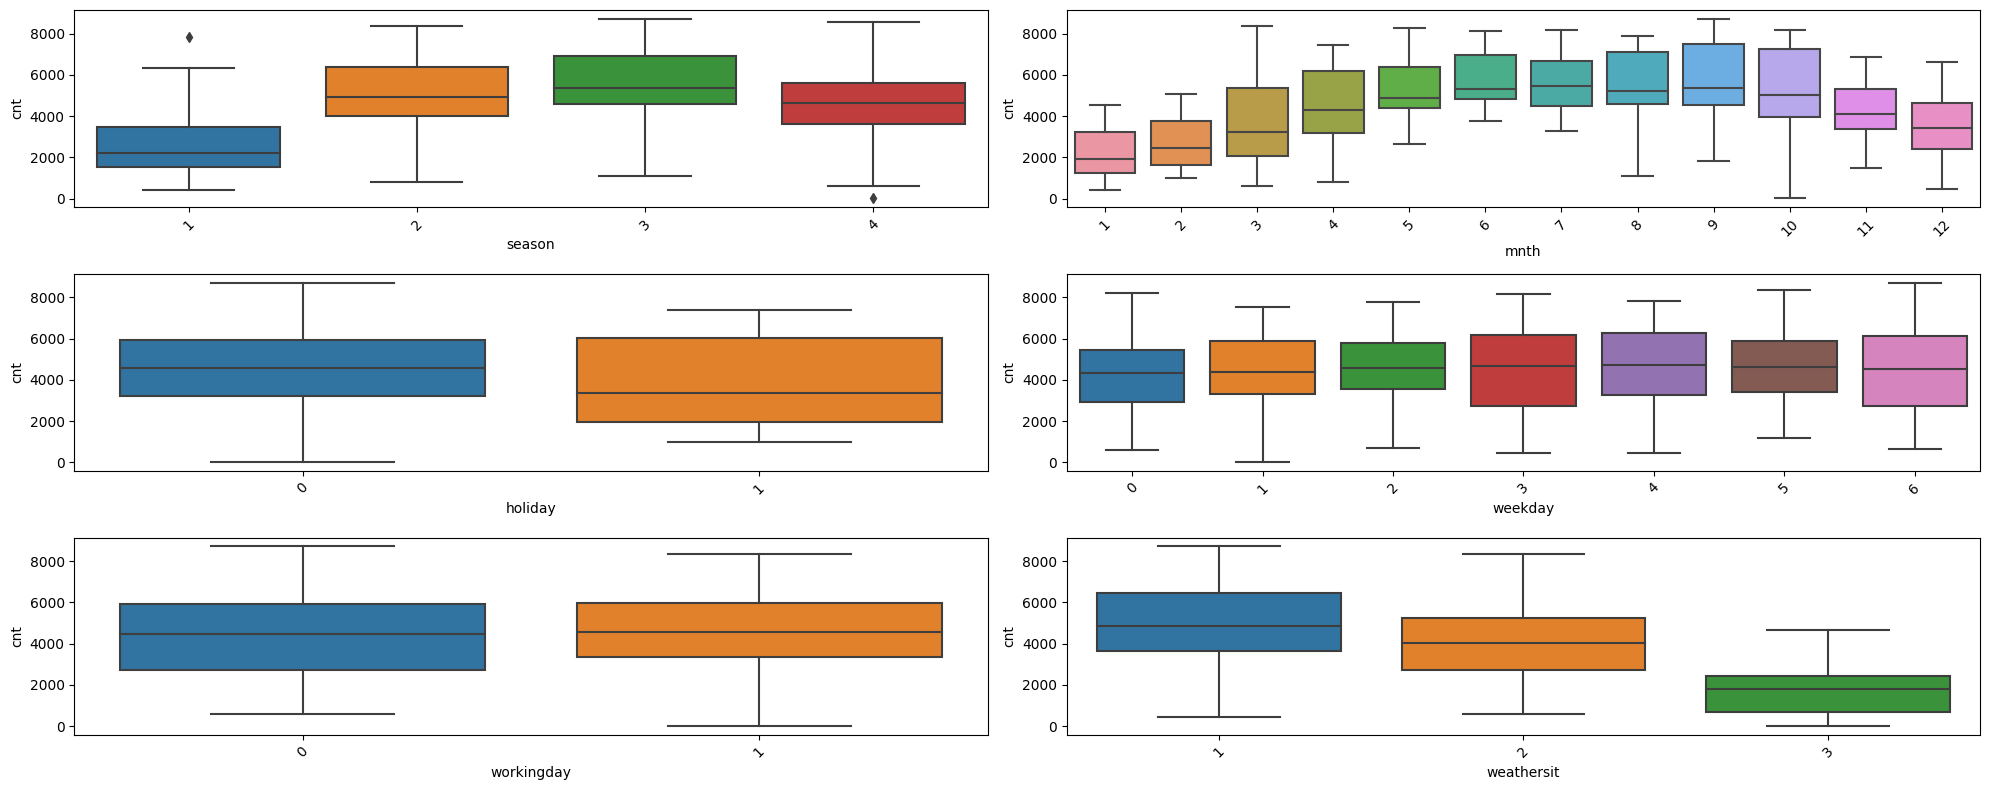

In [1402]:
plt.figure(figsize=(20, 8))
categorical_columns = ['season','mnth', 'holiday','weekday','workingday','weathersit']
target_column = bike_sharing_data['cnt']

for i, col in enumerate(categorical_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=bike_sharing_data[col], y=target_column)
    plt.xlabel(col)  
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Understanding the boxplots

#### season: median close to 55000, season 3 takes more booking, followed by season 2 and season 4. Out of all season 1, we have very less demand.
#### mnth: more booking in the months of 6, 7, 8, 9, 10 with almost the same median value. Of all considerable booking from April to November, higher demand
#### holiday: 3000 to 6000 bikes booked. Mean shows little above to 4000 bikes. And even on holidays, there is more booking. But median stands less than 4000. 
#### weekday: the median lies between 4000 to 4500 and more booking on wednesdays. Very close trend each day as compared all the days in the week.
#### workingday: the median stands same for working day and NOT a working a day. But working day spread more even & perfect. Seems to be a good variable
#### weathersit: very look demand in weathersit-3. More demand in weathersit-1 then comes weather-2. Varying median in all the weathersit 1,2,3

# viewing the correlation
### atemp vs temp are the only two features having high correlation, indicates that they are highly linearly dependent.
### also, all these variables are correlated with the target variable cnt. 

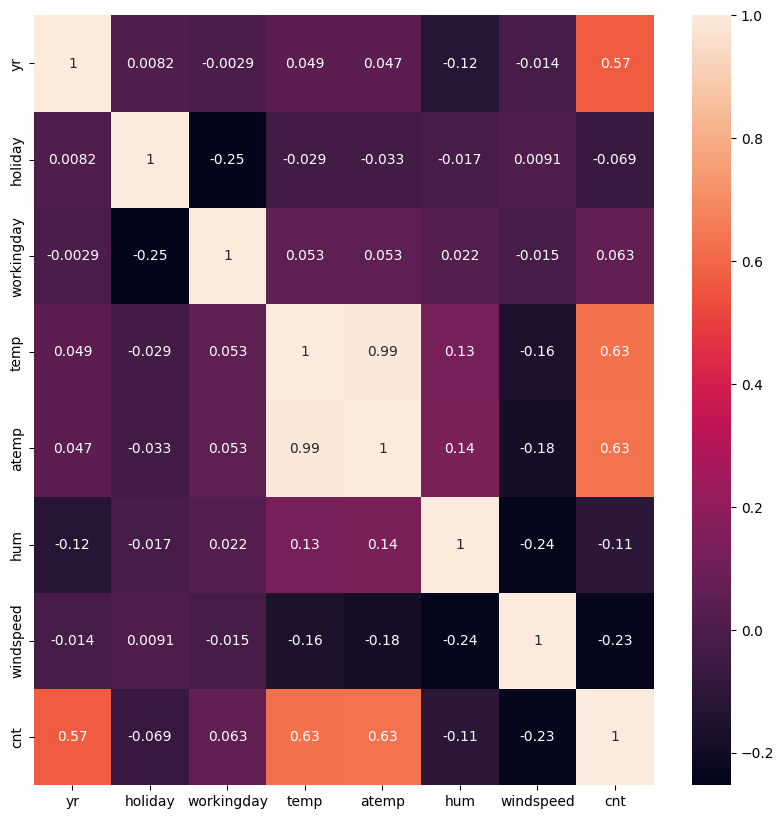

In [1406]:
plt.figure(figsize = (10,10))
sns.heatmap(bike_sharing_data.corr(), annot = True)
plt.show()

# Viewing pair-plot for numeric columns

In [ ]:
num_cols = bike_sharing_data[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(num_cols, diag_kind='kde')
plt.show()

# Encoding of categorical columns

In [ ]:

bike_sharing_data_encoded = pd.get_dummies(bike_sharing_data, drop_first=True)
bike_sharing_data_encoded.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Final list of columns, after removing unwanted ones and categorical encoding

In [ ]:
bike_sharing_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [ ]:
bike_sharing_data.shape

(730, 12)

# Re-visiting the heatmap for correlation, after encoding
### the correlation of different variables with the target variable seems good. not dropping any column for now

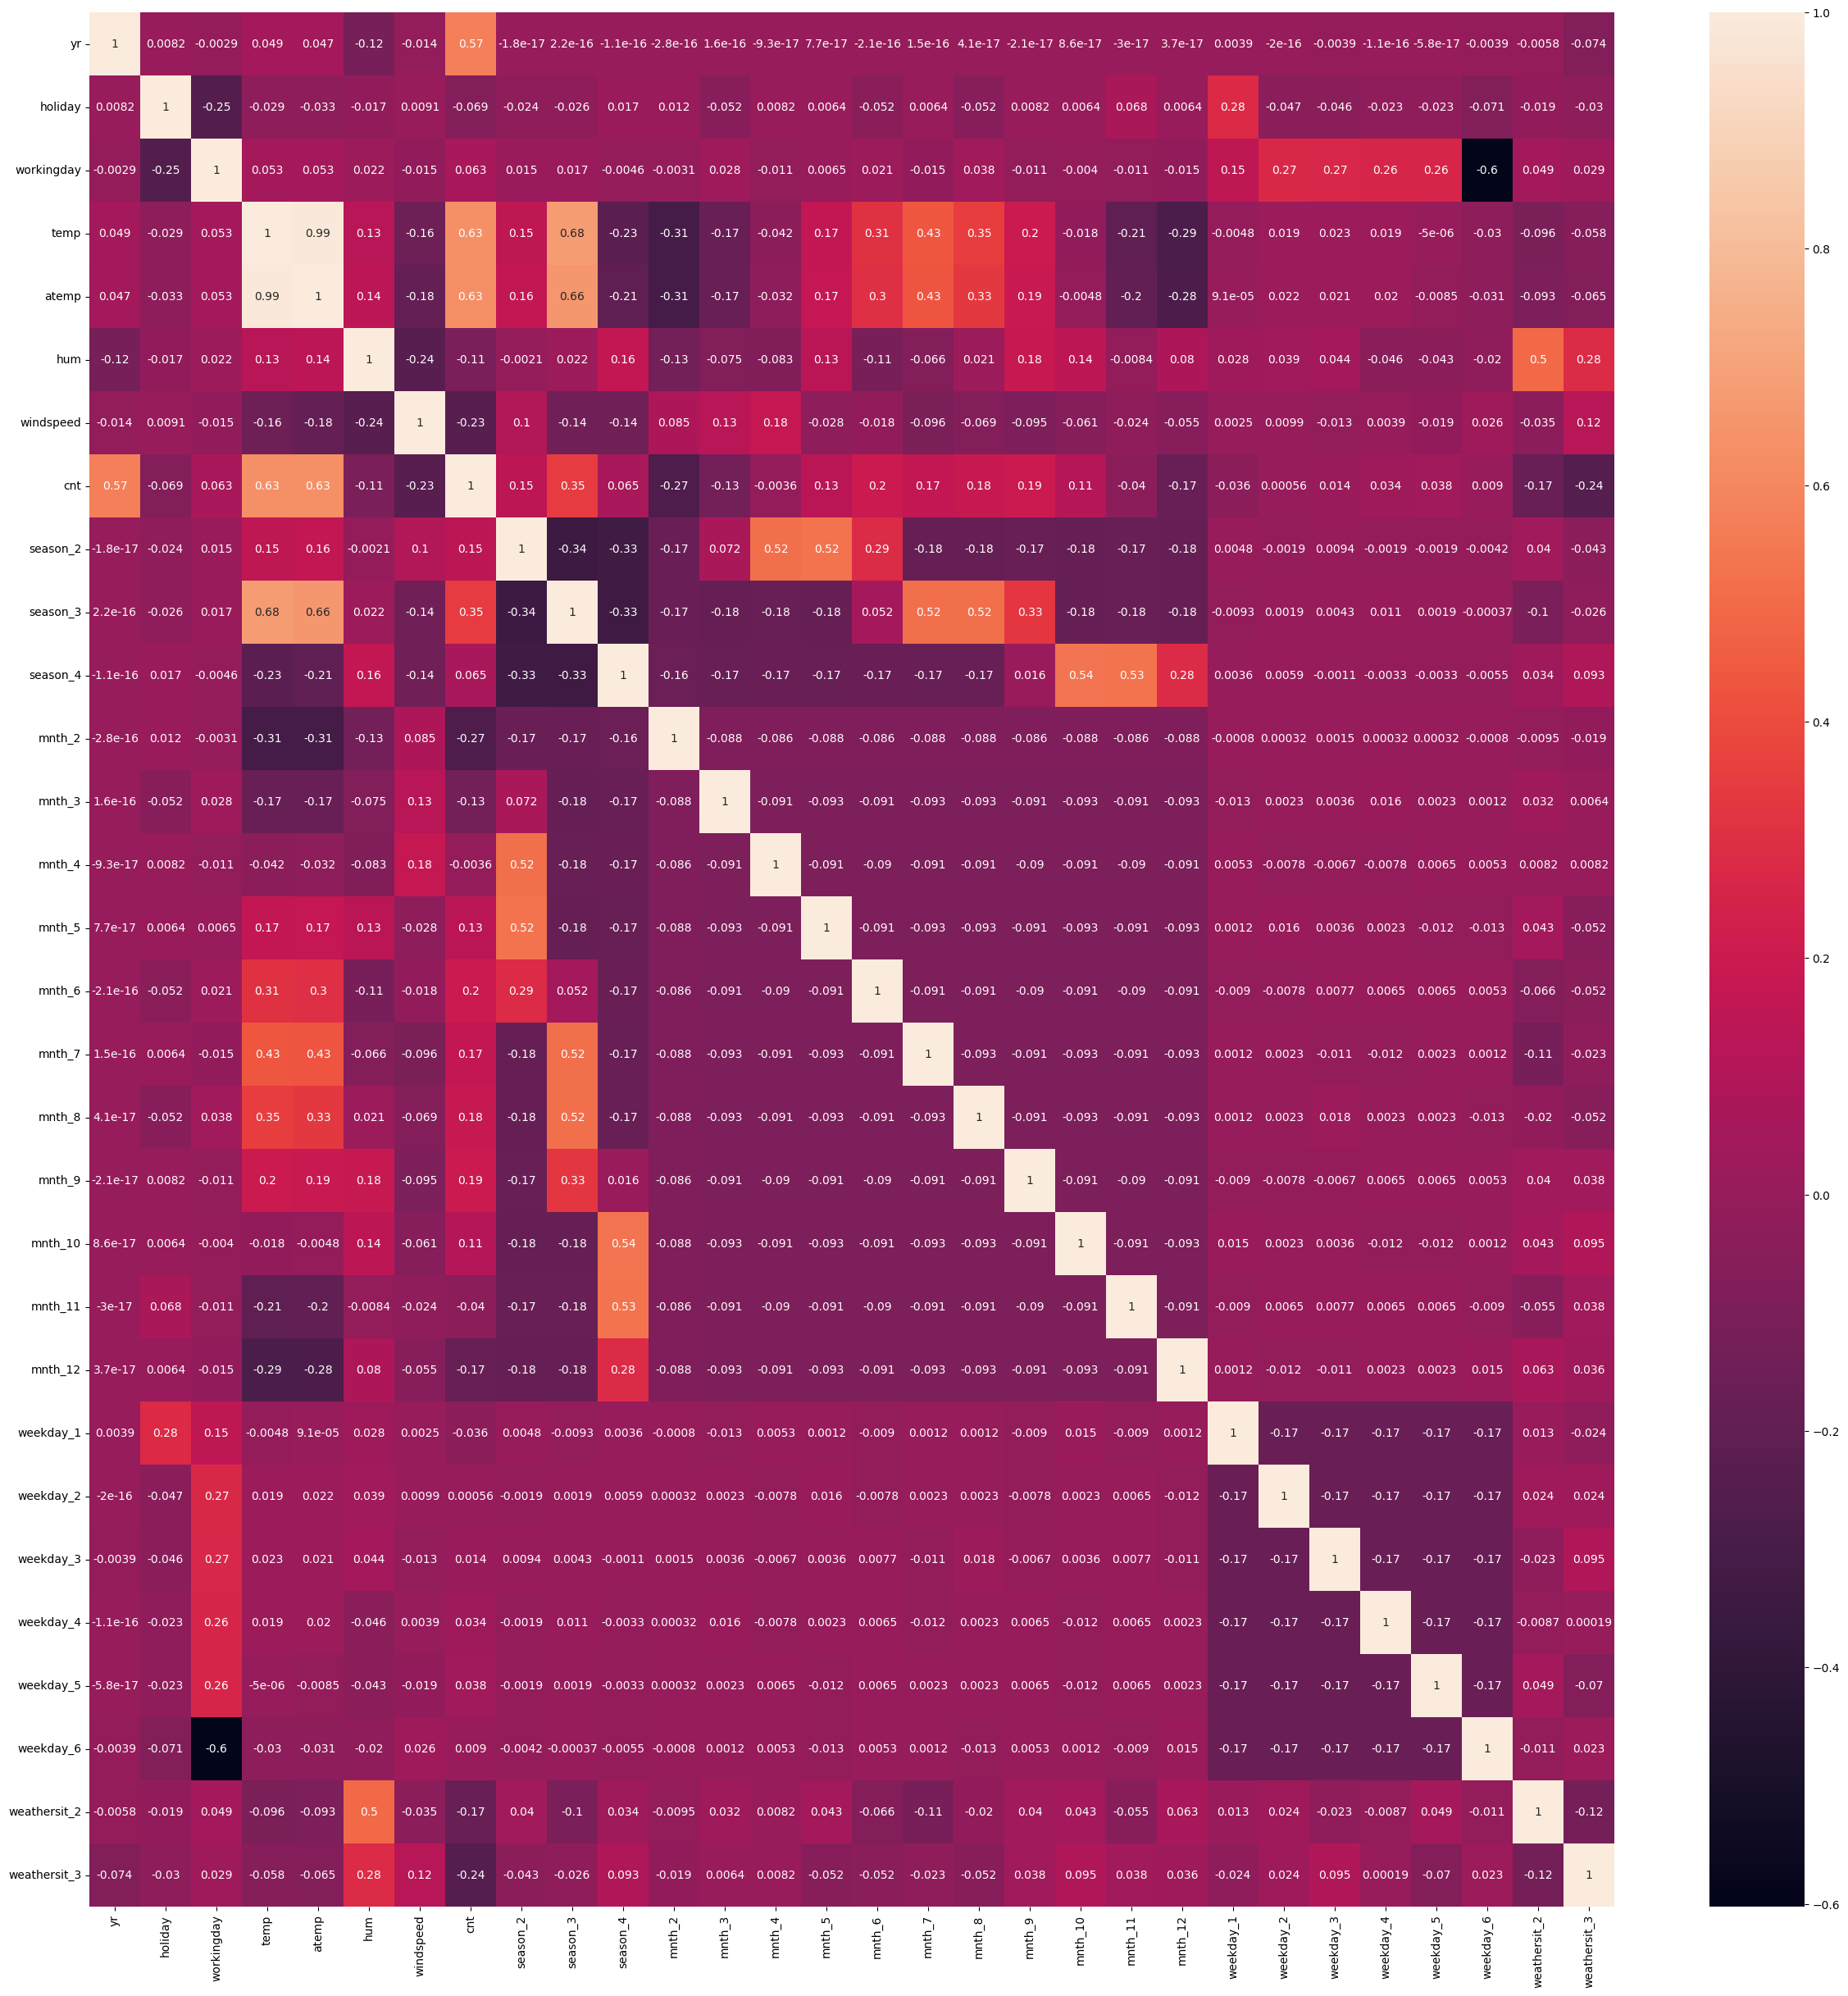

In [ ]:
plt.figure(figsize = (30,30))
sns.heatmap(bike_sharing_data_encoded.corr(), annot = True)
plt.show()

# Framing x and y datasets

In [ ]:
x = bike_sharing_data_encoded.drop(['cnt'], axis=1)
y = bike_sharing_data_encoded['cnt']

x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

# spitting the data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)
print('X_train:', X_train.shape, 'X_test:', X_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (547, 29) X_test: (183, 29) y_train: (547,) y_test: (183,)


In [ ]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
182,0,0,0,30.271653,33.36540,44.4583,7.709154,0,1,0,...,0,0,0,0,0,0,0,1,0,0
261,0,0,1,22.515847,26.48375,69.0000,10.166714,0,1,0,...,0,0,1,0,0,0,0,0,1,0
431,1,0,1,21.627500,26.23020,56.7500,25.201627,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62,0,0,1,10.728347,12.78395,61.0417,13.624182,0,0,0,...,0,0,0,0,0,0,1,0,1,0
473,1,0,1,20.431653,24.65230,61.2500,4.417256,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
y_train.head()

182    5119
261    4539
431    5382
62     1944
473    6565
Name: cnt, dtype: int64

# Scalling X_train

In [ ]:
scaler = MinMaxScaler()
X_train[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(X_train[['temp', 'atemp', 'hum', 'windspeed']])
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
182,0,0,0,0.846320,0.772142,0.215124,0.192132,0,1,0,...,0,0,0,0,0,0,0,1,0,0
261,0,0,1,0.610610,0.591480,0.613617,0.305631,0,1,0,...,0,0,1,0,0,0,0,0,1,0
431,1,0,1,0.583612,0.584824,0.414709,1.000000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
62,0,0,1,0.252371,0.231824,0.484395,0.465310,0,0,0,...,0,0,0,0,0,0,1,0,1,0
473,1,0,1,0.547268,0.543400,0.487778,0.040100,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# unfortunately y_train happens to be a series object, so, a bit lengthly code.

In [ ]:
y_train_cnt = y_train.values.reshape(-1, 1)
y_train_cnt_scaled = scaler.fit_transform(y_train_cnt)
y_train_scaled = pd.Series(y_train_cnt_scaled.flatten(), name=y_train.name, index=y_train.index)


y_train_scaled.head()

182    0.597328
261    0.529357
431    0.628150
62     0.225243
473    0.766788
Name: cnt, dtype: float64

# Model 1 - Linear Regression model using statstatsmodels

In [ ]:
X_train_sm = sm.add_constant(X_train)       
lr_1 = sm.OLS(y_train_scaled, X_train_sm)
lr_1_model = lr_1.fit()

lr_1_model.params

const           0.141574
yr              0.236818
holiday        -0.057876
workingday      0.037347
temp            0.039208
atemp           0.412507
hum            -0.119638
windspeed      -0.114278
season_2        0.090231
season_3        0.073998
season_4        0.186342
mnth_2          0.017964
mnth_3          0.073052
mnth_4          0.059608
mnth_5          0.096716
mnth_6          0.065117
mnth_7          0.016769
mnth_8          0.068272
mnth_9          0.127662
mnth_10         0.048894
mnth_11        -0.025363
mnth_12        -0.017352
weekday_1      -0.019397
weekday_2      -0.008645
weekday_3      -0.001972
weekday_4       0.004863
weekday_5       0.004622
weekday_6       0.050338
weathersit_2   -0.052937
weathersit_3   -0.232457
dtype: float64

# In the below summary table:
### R-squared: 0.846, means that approximately 84.6% of the variability in the dependent variable is explained by the independent variables in your model. This is a relatively high R-squared value, indicating that the model is quite effective in explaining and predicting the variation in the dependent variable 

### F-statistic (101.3) suggests that the model, as a whole, is more likely to be statistically significant

### Prob (F-statistic): 4.33e-190" suggests that the overall model is statistically significant. More specifically

In [ ]:
lr_1_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          4.33e-190
Time:                        18:45:18   Log-Likelihood:                 546.48
No. Observations:                 547   AIC:                            -1035.
Df Residuals:                     518   BIC:                            -910.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1416      0.023      6.072      0.000       0.096       0.187
yr               0.2368      0.008     29.140      0.000       0.221       0.253
holiday         -0.0579      0.024     -2.442      0.015      -0.104      -0.011
workingday       0.0373      0.009      3.997      0.000       0.019       0.056
temp             0.0392      0.258      0.152      0.879      -0.468       0.546
atemp            0.4125      0.265      1.556      0.120      -0.108       0.933
hum             -0.1196      0.027     -4.508      0.000      -0.172      -0.067
windspeed       -0.1143      0.020     -5.808      0.000      -0.153      -0.076
season_2         0.0902      0.025      3.657      0.000       0.042       0.139
season_3         0.0740      0.030      2.505      0.013       0.016       0.132
season_4         0.1863      0.026      7.110      0.000       0.135       0.238
mnth_2           0.0180      0.020      0.917      0.360      -0.021       0.056
mnth_3           0.0731      0.022      3.317      0.001       0.030       0.116
mnth_4           0.0596      0.034      1.760      0.079      -0.007       0.126
mnth_5           0.0967      0.037      2.645      0.008       0.025       0.169
mnth_6           0.0651      0.039      1.662      0.097      -0.012       0.142
mnth_7           0.0168      0.043      0.386      0.700      -0.069       0.102
mnth_8           0.0683      0.042      1.626      0.105      -0.014       0.151
mnth_9           0.1277      0.037      3.434      0.001       0.055       0.201
mnth_10          0.0489      0.034      1.421      0.156      -0.019       0.117
mnth_11         -0.0254      0.033     -0.770      0.441      -0.090       0.039
mnth_12         -0.0174      0.027     -0.647      0.518      -0.070       0.035
weekday_1       -0.0194      0.010     -1.979      0.048      -0.039      -0.000
weekday_2       -0.0086      0.011     -0.776      0.438      -0.031       0.013
weekday_3       -0.0020      0.011     -0.176      0.860      -0.024       0.020
weekday_4        0.0049      0.010      0.471      0.638      -0.015       0.025
weekday_5        0.0046      0.011      0.424      0.672      -0.017       0.026
weekday_6        0.0503      0.015      3.459      0.001       0.022       0.079
weathersit_2    -0.0529      0.011     -4.789      0.000      -0.075      -0.031
weathersit_3    -0.2325      0.029     -7.977      0.000      -0.290      -0.175
==============================================================================
Omnibus:                       97.916   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.917
Skew:                          -0.901   Prob(JB):                     1.98e-55
Kurtosis:                       5.794   Cond. No.                     2.25e+15
===============

# Model 1 -> find VIF (i) = 1 /  (1 - rsquare)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in  range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
24,weekday_4,inf
2,workingday,inf
23,weekday_3,inf
22,weekday_2,inf
21,weekday_1,inf
25,weekday_5,inf
1,holiday,inf
3,temp,1506.52
4,atemp,1434.59
8,season_3,14.67


# Proceding with the below interpretation

## Features with High p-value and High VIF:
### Interpretation: These features are both statistically insignificant and contribute to multicollinearity.
### Action: Consider removing these features from the model. They don't provide significant explanatory power, and their presence may lead to multicollinearity issues.

## Features with High p-value and Low VIF:
### Interpretation: These features are statistically insignificant but don't contribute significantly to multicollinearity.
### Action: Evaluate the importance of these features in the context of your problem. If they are not essential, consider removing them. If they are important, you may want to explore other transformations or interactions.

## Features with Low p-value and High VIF:
### Interpretation: These features are statistically significant, but their presence may contribute to multicollinearity.
### Action: Assess the importance of these features. If they are crucial for your analysis, you might consider keeping them but explore options to address multicollinearity, such as feature engineering, regularization, or removing one of the correlated variables.

## Features with Low p-value and Low VIF:
### Interpretation: These features are statistically significant and do not exhibit high multicollinearity.
### Action: These are generally desirable features to include in your model. They contribute meaningfully to the prediction without introducing multicollinearity concerns.

# Model 1 - Removing the features 
#### 'weekday_4','weekday_3.'weekday_2','weekday_1','weekday_5','weekday_6','holiday','temp'
#### really sure why these weekday_n columns are showing infinite 'inf' as VIF. They should have some value. Followed all basics in the coding and these are just categorical encoded colums. Anyway deleting them. 

In [ ]:
X_train_sm.drop(['weekday_4','weekday_3','weekday_2','weekday_1','weekday_5','weekday_6','holiday','atemp'], axis=1, inplace=True)
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

# Model 2 

In [ ]:
#X_train_sm = sm.add_constant(X_train)       
lr_2 = sm.OLS(y_train_scaled, X_train_sm)
lr_2_model = lr_2.fit()

lr_2_model.params

const           0.161548
yr              0.236744
workingday      0.015476
temp            0.427190
hum            -0.119108
windspeed      -0.124409
season_2        0.089848
season_3        0.073186
season_4        0.189928
mnth_2          0.019817
mnth_3          0.080483
mnth_4          0.067760
mnth_5          0.100508
mnth_6          0.070580
mnth_7          0.022345
mnth_8          0.072521
mnth_9          0.129320
mnth_10         0.055612
mnth_11        -0.024016
mnth_12        -0.010312
weathersit_2   -0.051371
weathersit_3   -0.229131
dtype: float64

In [ ]:
lr_2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     127.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          2.63e-190
Time:                        18:45:18   Log-Likelihood:                 529.36
No. Observations:                 547   AIC:                            -1015.
Df Residuals:                     525   BIC:                            -920.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1615      0.023      7.177      0.000       0.117       0.206
yr               0.2367      0.008     28.497      0.000       0.220       0.253
workingday       0.0155      0.009      1.780      0.076      -0.002       0.033
temp             0.4272      0.047      9.149      0.000       0.335       0.519
hum             -0.1191      0.027     -4.454      0.000      -0.172      -0.067
windspeed       -0.1244      0.019     -6.508      0.000      -0.162      -0.087
season_2         0.0898      0.025      3.556      0.000       0.040       0.139
season_3         0.0732      0.030      2.421      0.016       0.014       0.133
season_4         0.1899      0.027      7.108      0.000       0.137       0.242
mnth_2           0.0198      0.020      0.989      0.323      -0.020       0.059
mnth_3           0.0805      0.022      3.587      0.000       0.036       0.125
mnth_4           0.0678      0.035      1.958      0.051      -0.000       0.136
mnth_5           0.1005      0.037      2.691      0.007       0.027       0.174
mnth_6           0.0706      0.040      1.781      0.076      -0.007       0.148
mnth_7           0.0223      0.044      0.507      0.612      -0.064       0.109
mnth_8           0.0725      0.043      1.703      0.089      -0.011       0.156
mnth_9           0.1293      0.038      3.427      0.001       0.055       0.203
mnth_10          0.0556      0.035      1.583      0.114      -0.013       0.125
mnth_11         -0.0240      0.034     -0.713      0.476      -0.090       0.042
mnth_12         -0.0103      0.027     -0.377      0.707      -0.064       0.043
weathersit_2    -0.0514      0.011     -4.603      0.000      -0.073      -0.029
weathersit_3    -0.2291      0.029     -7.859      0.000      -0.286      -0.172
==============================================================================
Omnibus:                       85.499   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.252
Skew:                          -0.782   Prob(JB):                     7.41e-50
Kurtosis:                       5.735   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF after Model 2

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in  range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,31.47
7,season_3,10.86
14,mnth_7,9.48
15,mnth_8,8.33
8,season_4,7.99
13,mnth_6,7.81
6,season_2,7.48
3,temp,7.13
12,mnth_5,6.67
16,mnth_9,6.54


# Model 2 -Removing features based on the explained criteria of p-value and vif

In [ ]:
X_train_sm.drop(['mnth_6', 'mnth_4', 'mnth_6', 'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_12'], axis=1, inplace=True)
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_2', 'mnth_5', 'mnth_7', 'mnth_11',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

# Model 3

In [ ]:
#X_train_sm = sm.add_constant(X_train)       
lr_3 = sm.OLS(y_train_scaled, X_train_sm)
lr_3_model = lr_3.fit()

lr_3_model.params

const           0.159836
yr              0.234738
workingday      0.016842
temp            0.501077
hum            -0.113947
windspeed      -0.115592
season_2        0.112901
season_3        0.102954
season_4        0.190347
mnth_2         -0.007744
mnth_5          0.022623
mnth_7         -0.075229
mnth_11        -0.057754
weathersit_2   -0.049597
weathersit_3   -0.229116
dtype: float64

In [ ]:
lr_3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     176.7
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          1.49e-189
Time:                        18:45:18   Log-Likelihood:                 509.12
No. Observations:                 547   AIC:                            -988.2
Df Residuals:                     532   BIC:                            -923.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1598      0.022      7.407      0.000       0.117       0.202
yr               0.2347      0.008     27.784      0.000       0.218       0.251
workingday       0.0168      0.009      1.884      0.060      -0.001       0.034
temp             0.5011      0.035     14.415      0.000       0.433       0.569
hum             -0.1139      0.027     -4.286      0.000      -0.166      -0.062
windspeed       -0.1156      0.019     -5.958      0.000      -0.154      -0.077
season_2         0.1129      0.017      6.614      0.000       0.079       0.146
season_3         0.1030      0.022      4.782      0.000       0.061       0.145
season_4         0.1903      0.016     12.073      0.000       0.159       0.221
mnth_2          -0.0077      0.018     -0.437      0.662      -0.043       0.027
mnth_5           0.0226      0.018      1.257      0.209      -0.013       0.058
mnth_7          -0.0752      0.018     -4.246      0.000      -0.110      -0.040
mnth_11         -0.0578      0.019     -3.119      0.002      -0.094      -0.021
weathersit_2    -0.0496      0.011     -4.343      0.000      -0.072      -0.027
weathersit_3    -0.2291      0.030     -7.663      0.000      -0.288      -0.170
==============================================================================
Omnibus:                       65.758   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.137
Skew:                          -0.632   Prob(JB):                     1.69e-35
Kurtosis:                       5.330   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF after Model 3

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in  range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,27.22
7,season_3,5.18
3,temp,3.72
6,season_2,3.21
8,season_4,2.62
4,hum,2.13
13,weathersit_2,1.69
10,mnth_5,1.46
11,mnth_7,1.44
12,mnth_11,1.42


---------------- RFE --------------------------------------

# Model 3 - Removing features based on the explained criteria of p-value and vif
### 'hum', 'season_3'

In [ ]:
X_train_sm.drop(['hum', 'season_3'], axis=1, inplace=True)
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_2', 'mnth_5', 'mnth_7', 'mnth_11', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

# Model 4

In [ ]:
#X_train_sm = sm.add_constant(X_train)       
lr_4 = sm.OLS(y_train_scaled, X_train_sm)
lr_4_model = lr_4.fit()

lr_4_model.params

const           0.099902
yr              0.236613
workingday      0.017476
temp            0.600506
windspeed      -0.094492
season_2        0.063354
season_4        0.138822
mnth_2         -0.025982
mnth_5          0.000188
mnth_7         -0.054405
mnth_11        -0.044890
weathersit_2   -0.076087
weathersit_3   -0.284441
dtype: float64

In [ ]:
lr_4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     188.0
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          7.64e-183
Time:                        18:45:18   Log-Likelihood:                 487.74
No. Observations:                 547   AIC:                            -949.5
Df Residuals:                     534   BIC:                            -893.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0999      0.019      5.239      0.000       0.062       0.137
yr               0.2366      0.009     27.404      0.000       0.220       0.254
workingday       0.0175      0.009      1.886      0.060      -0.001       0.036
temp             0.6005      0.023     25.609      0.000       0.554       0.647
windspeed       -0.0945      0.019     -4.909      0.000      -0.132      -0.057
season_2         0.0634      0.013      4.905      0.000       0.038       0.089
season_4         0.1388      0.013     10.499      0.000       0.113       0.165
mnth_2          -0.0260      0.018     -1.465      0.143      -0.061       0.009
mnth_5           0.0002      0.018      0.010      0.992      -0.036       0.036
mnth_7          -0.0544      0.018     -3.007      0.003      -0.090      -0.019
mnth_11         -0.0449      0.019     -2.355      0.019      -0.082      -0.007
weathersit_2    -0.0761      0.009     -8.077      0.000      -0.095      -0.058
weathersit_3    -0.2844      0.027    -10.557      0.000      -0.337      -0.232
==============================================================================
Omnibus:                       53.239   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.001
Skew:                          -0.576   Prob(JB):                     5.82e-24
Kurtosis:                       4.835   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF after Model 4

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in  range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,19.73
5,season_2,1.71
6,season_4,1.71
3,temp,1.57
8,mnth_5,1.40
10,mnth_11,1.40
9,mnth_7,1.39
7,mnth_2,1.26
4,windspeed,1.12
11,weathersit_2,1.07


# Parameters after Model 4, we can remove mnth_2 and mnth_5, as the p-value is more and VIF is low, these two become insignificant

In [ ]:
X_train_sm.drop(['mnth_2','mnth_5'], axis=1, inplace=True)
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_2',
       'season_4', 'mnth_7', 'mnth_11', 'weathersit_2', 'weathersit_3'],
      dtype='object')

# Model 5

In [ ]:
#X_train_sm = sm.add_constant(X_train)       
lr_5 = sm.OLS(y_train_scaled, X_train_sm)
lr_5_model = lr_5.fit()

lr_5_model.params

const           0.091109
yr              0.236081
workingday      0.016914
temp            0.610654
windspeed      -0.096030
season_2        0.067240
season_4        0.143748
mnth_7         -0.053292
mnth_11        -0.043904
weathersit_2   -0.075563
weathersit_3   -0.283563
dtype: float64

In [ ]:
lr_5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     225.4
Date:                Tue, 12 Dec 2023   Prob (F-statistic):          9.85e-185
Time:                        18:45:19   Log-Likelihood:                 486.64
No. Observations:                 547   AIC:                            -951.3
Df Residuals:                     536   BIC:                            -903.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0911      0.018      5.038      0.000       0.056       0.127
yr               0.2361      0.009     27.363      0.000       0.219       0.253
workingday       0.0169      0.009      1.827      0.068      -0.001       0.035
temp             0.6107      0.022     27.408      0.000       0.567       0.654
windspeed       -0.0960      0.019     -5.009      0.000      -0.134      -0.058
season_2         0.0672      0.011      6.034      0.000       0.045       0.089
season_4         0.1437      0.013     11.238      0.000       0.119       0.169
mnth_7          -0.0533      0.018     -2.951      0.003      -0.089      -0.018
mnth_11         -0.0439      0.019     -2.304      0.022      -0.081      -0.006
weathersit_2    -0.0756      0.009     -8.033      0.000      -0.094      -0.057
weathersit_3    -0.2836      0.027    -10.527      0.000      -0.336      -0.231
==============================================================================
Omnibus:                       50.158   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.181
Skew:                          -0.548   Prob(JB):                     1.76e-22
Kurtosis:                       4.787   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# VIF after Model 5

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values,i) for i in  range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
0,const,17.74
6,season_4,1.60
3,temp,1.42
8,mnth_11,1.40
7,mnth_7,1.39
5,season_2,1.27
4,windspeed,1.11
9,weathersit_2,1.06
10,weathersit_3,1.05
1,yr,1.01


# Residual Analysis

In [ ]:
y_train_pred = lr_5_model.predict(X_train_sm) 
y_train_pred

182    0.536175
261    0.375980
431    0.604458
62     0.141887
473    0.741684
         ...   
75     0.332270
599    0.819176
575    0.772007
337    0.432388
523    0.823930
Length: 547, dtype: float64

# Visualizing the residuals - not a 100% normally distributed one :-(

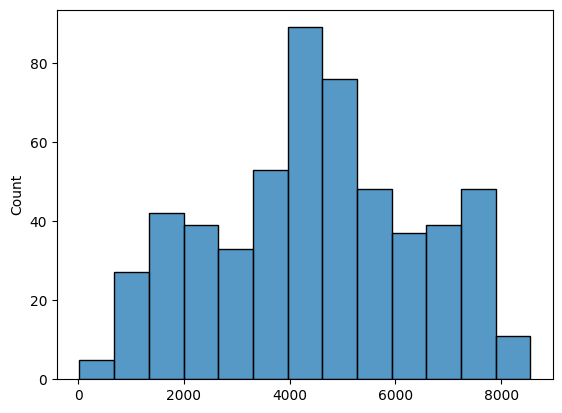

In [ ]:
res = y_train - y_train_pred
x = sns.histplot(res)
plt.show()

# Predicting the Model on test data

In [ ]:
scaler = MinMaxScaler()
X_test[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(X_test[['temp', 'atemp', 'hum', 'windspeed']])
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
299,0,0,1,0.502885,0.478679,0.813203,0.447619,0,0,1,...,0,0,0,0,0,1,0,0,1,0
723,1,1,0,0.261711,0.249188,0.686333,0.357702,0,0,0,...,0,1,0,1,0,0,0,0,1,0
647,1,0,1,0.562495,0.543746,0.517546,0.416832,0,0,1,...,0,0,0,0,1,0,0,0,0,0
520,1,0,1,0.598484,0.575859,0.489130,0.484197,1,0,0,...,0,0,0,1,0,0,0,0,1,0
114,0,0,1,0.687336,0.644471,0.754342,0.409128,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
y_test_cnt = y_test.values.reshape(-1, 1)
y_test_cnt_scaled = scaler.fit_transform(y_test_cnt)
y_test_scaled = pd.Series(y_test_cnt_scaled.flatten(), name=y_test.name, index=y_test.index)

In [ ]:
X_test.drop(['holiday','hum','season_3','atemp', 'weekday_4','weekday_3','weekday_2','weekday_1','weekday_5','weekday_6',
             'mnth_6', 'mnth_4', 'mnth_3', 'mnth_2','mnth_5', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_12'], axis=1, inplace=True)
X_test.columns

Index(['yr', 'workingday', 'temp', 'windspeed', 'season_2', 'season_4',
       'mnth_7', 'mnth_11', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [ ]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_5_model.predict(X_test_sm)
y_test_pred

299    0.440311
723    0.377091
647    0.791312
520    0.654749
114    0.555698
         ...   
227    0.550901
424    0.612566
80     0.407693
98     0.261043
467    0.665359
Length: 183, dtype: float64

# Evaluating the Model after test run, using r2_score
# r2score on test = 0.808 is a good score
# And variable 'temp' has the highest co-efficient of 0.6017

In [ ]:
print(r2_score(y_true=y_test_scaled, y_pred=y_test_pred))

0.808456818436182


# Using RFE of sklearn

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
print(X_train.shape, y_train.shape)

(547, 29) (547,)


In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, step=15)           # top ten features
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', False, 2),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 2),
 ('mnth_3', False, 2),
 ('mnth_4', False, 2),
 ('mnth_5', False, 2),
 ('mnth_6', False, 2),
 ('mnth_7', False, 2),
 ('mnth_8', False, 2),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 2),
 ('mnth_12', False, 2),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 2),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

# Support cols

In [ ]:
X_train_support_cols = X_train.columns[rfe.support_]
X_train_support_cols

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_4',
       'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_3'],
      dtype='object')

# Not supported cols

In [ ]:
X_train_support_cols = X_train.columns[~rfe.support_]
X_train_support_cols

Index(['temp', 'season_2', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_6', 'weathersit_2'],
      dtype='object')

# We see the best supported features (from sklearn) are well included in the final features Model_5 (using statsmodel).
# Further if we run the Model and performs the same analysis using VIF and p-value, it is expected to the last 11 features